# Libraries

In [40]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Binary Classification & Model Explainability

# Load the data

In [35]:
labels=['with_glasses',   #0
        'without_glasses']    #1
image_size = (96,96)
train_path = 'shared/389.204-2023W/celebA/binary_classification/train'
test_path = 'shared/389.204-2023W/celebA/binary_classification/test'

In [36]:
train_dataset = image_dataset_from_directory(
    directory = train_path,
    labels='inferred',
    class_names = labels,
    label_mode='binary',
    image_size=image_size,
    color_mode='rgb',
    batch_size=32,
    crop_to_aspect_ratio=True,
    shuffle=True,
    seed=42,
    validation_split=None)

test_dataset = image_dataset_from_directory(
    directory = test_path,
    labels='inferred',
    label_mode='binary',
    image_size=image_size,
    color_mode='rgb',
    batch_size=32,
    crop_to_aspect_ratio=True,
    shuffle=True,
    seed=42,
    validation_split=None)

Found 20002 files belonging to 2 classes.
Found 1004 files belonging to 2 classes.


In [37]:
# Rescale images to (96, 96, 3)
train_dataset = train_dataset.map(lambda x, y: (tf.image.resize(x, (96, 96)), y))
test_dataset = test_dataset.map(lambda x, y: (tf.image.resize(x, (96, 96)), y))


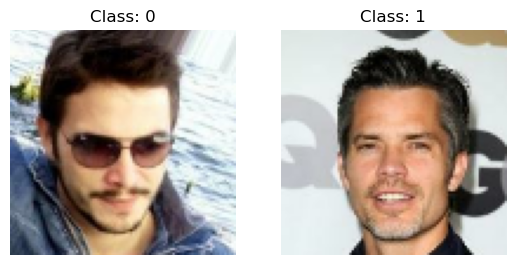

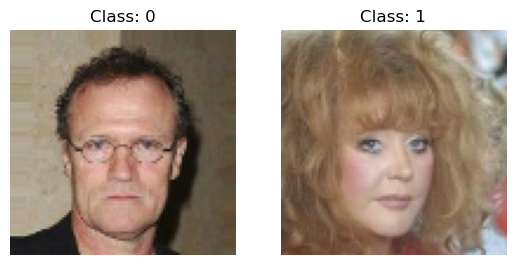

In [7]:
# Plot one image for each class from the train set
for images, labels in train_dataset.take(1):
    labels = tf.squeeze(labels, axis=1)
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.imshow(images[labels == i][0].numpy().astype("uint8"))
        plt.title(f"Class: {i}")
        plt.axis("off")
    plt.show()

# Plot one image for each class from the test set
for images, labels in test_dataset.take(1):
    labels = tf.squeeze(labels, axis=1)
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.imshow(images[labels == i][0].numpy().astype("uint8"))
        plt.title(f"Class: {i}")
        plt.axis("off")
    plt.show()


# Task 1.1

## Baselines

In [5]:
X_train, y_train = [], []
for images, labels in train_dataset:
    X_train.extend(images.numpy())
    y_train.extend(labels.numpy())
X_train, y_train = np.array(X_train), np.array(y_train).ravel() 

X_test, y_test = [], []
for images, labels in test_dataset:
    X_test.extend(images.numpy())
    y_test.extend(labels.numpy())
X_test, y_test = np.array(X_test), np.array(y_test).ravel()

# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [6]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

# Select 30% of the data
X_train_subset, _, y_train_subset, _ = train_test_split(X_train_flatten, y_train, train_size=0.3, random_state=42)
X_test_subset, _, y_test_subset, _ = train_test_split(X_test_flatten, y_test, train_size=0.3, random_state=42)




In [10]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled_subset = scaler.fit_transform(X_train_subset)
X_test_scaled_subset = scaler.transform(X_test_subset)


### Ridge Classifier - no scaling

In [20]:
# Ridge Classifier 
ridge_classifier = RidgeClassifier(alpha=100)  
ridge_classifier.fit(X_train_subset, y_train_subset)

# Predictions on the test set
y_pred = ridge_classifier.predict(X_test_subset)

# Performance
accuracy = accuracy_score(y_test_subset, y_pred)
conf_matrix = confusion_matrix(y_test_subset, y_pred)

# Results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Accuracy: 0.7342192691029901
Confusion Matrix:
 [[108  47]
 [ 33 113]]


### Ridge classifier - scaled

In [18]:
# Ridge Classifier
ridge_classifier = RidgeClassifier(alpha=100)  
ridge_classifier.fit(X_train_scaled_subset, y_train_subset)

# Predictions on the test set
y_pred = ridge_classifier.predict(X_test_scaled_subset)


In [19]:
# Performance
accuracy = accuracy_score(y_test_subset, y_pred)
conf_matrix = confusion_matrix(y_test_subset, y_pred)

# Rresults
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7973421926910299
Confusion Matrix:
 [[117  38]
 [ 23 123]]


### Logistic Reg - no scaling

In [8]:
# Logistic Regressor
logistic_regressor = LogisticRegression(max_iter=5000)
logistic_regressor.fit(X_train_subset, y_train_subset)

# Predictions on the test set
y_pred_logistic = logistic_regressor.predict(X_test_subset)

# Performance 
accuracy_logistic = accuracy_score(y_test_subset, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test_subset, y_pred_logistic)

# Results 
print("Logistic Regressor Accuracy:", accuracy_logistic)
print("Logistic Regressor Confusion Matrix:\n", conf_matrix_logistic)

Logistic Regressor Accuracy: 0.8438538205980066
Logistic Regressor Confusion Matrix:
 [[132  23]
 [ 24 122]]


### Logistic Regressor - scaled

In [12]:
# Logistic Regressor
logistic_regressor = LogisticRegression(max_iter=5000)
logistic_regressor.fit(X_train_scaled_subset, y_train_subset)

# Predictions on the test set
y_pred_logistic = logistic_regressor.predict(X_test_scaled_subset)

In [13]:

# Performance 
accuracy_logistic = accuracy_score(y_test_subset, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test_subset, y_pred_logistic)

# Results 
print("Logistic Regressor Accuracy:", accuracy_logistic)
print("Logistic Regressor Confusion Matrix:\n", conf_matrix_logistic)

Logistic Regressor Accuracy: 0.8604651162790697
Logistic Regressor Confusion Matrix:
 [[134  21]
 [ 21 125]]


### SVC - no scaling

In [7]:
# Support Vector Classifier (SVC)
svc_classifier = SVC(C=1.0, kernel='rbf', verbose=True)
svc_classifier.fit(X_train_subset, y_train_subset)

# Predictions on the test set
y_pred_svc = svc_classifier.predict(X_test_subset)

# Performance 
accuracy_svc = accuracy_score(y_test_subset, y_pred_svc)
conf_matrix_svc = confusion_matrix(y_test_subset, y_pred_svc)

# Results 
print("SVC Accuracy:", accuracy_svc)
print("SVC Confusion Matrix:\n", conf_matrix_svc)

[LibSVM]...*.*
optimization finished, #iter = 4637
obj = -2117.617535, rho = -0.570494
nSV = 3527, nBSV = 2368
Total nSV = 3527
SVC Accuracy: 0.8438538205980066
SVC Confusion Matrix:
 [[129  26]
 [ 21 125]]


### SVC - scaled

In [11]:

# Support Vector Classifier (SVC)
svc_classifier = SVC(C=1.0, kernel='rbf', verbose=True)
svc_classifier.fit(X_train_scaled_subset, y_train_subset)

# Predictions on the test set
y_pred_svc = svc_classifier.predict(X_test_scaled_subset)

# Performance 
accuracy_svc = accuracy_score(y_test_subset, y_pred_svc)
conf_matrix_svc = confusion_matrix(y_test_subset, y_pred_svc)

# Results
print("SVC Accuracy:", accuracy_svc)
print("SVC Confusion Matrix:\n", conf_matrix_svc)

[LibSVM]...*.*
optimization finished, #iter = 4664
obj = -1859.312131, rho = -0.582990
nSV = 3387, nBSV = 2007
Total nSV = 3387
SVC Accuracy: 0.8637873754152824
SVC Confusion Matrix:
 [[133  22]
 [ 19 127]]


## CNN 

In [43]:

def build_model_CNN(input_shape):
    

    input_layer = layers.Input(shape=input_shape, name='Input')

    conv1 = layers.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu',
    )(input_layer)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        strides=(1, 1),
        padding='same',
        activation='relu',
    )(pool1)

    pool4 = layers.GlobalAveragePooling2D(name='gpooling')(conv2)

    Dropout1 = layers.Dropout(0.5)(pool4)
    Dense = layers.Dense(
        units=32,
        name='Dense',
        activation='relu',
    )(Dropout1)
    Dropout2 = layers.Dropout(0.5)(Dense)
    output_layer = layers.Dense(
        units=1,
        activation='sigmoid',
        name='Output'
    )(Dropout2)

    # Connect input and output 
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='CNNmodel')

    # Compile the model
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model


In [44]:

input_shape = (96, 96, 3)

# Create the model
model_CNN = build_model_CNN(input_shape)

# Print model summary
model_CNN.summary()

# Define callbacks 
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model
history = model_CNN.fit(train_dataset, epochs=50, validation_data=test_dataset, callbacks=[early_stopping])


Model: "CNNmodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 gpooling (GlobalAveragePoo  (None, 64)                0         
 ling2D)                                                         
                                                                 
 dropout (Dropout)           (None, 64)                0  

32/32 [==============================] - 1s 25ms/step - loss: 0.1577 - accuracy: 0.9452
Test Accuracy: 94.52%


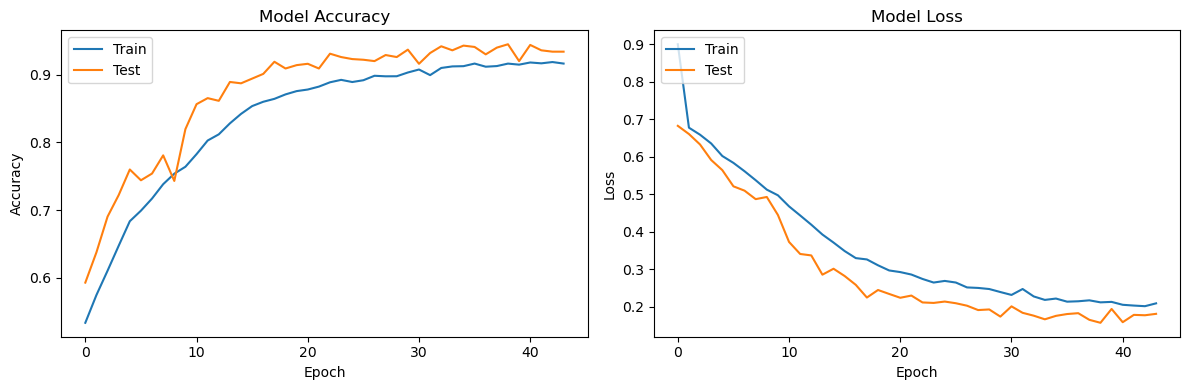

In [45]:
test_loss, test_accuracy = model_CNN.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## ResNet18

In [66]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.optimizers import Adam
import math

# Define the kaiming_normal initializer
kaiming_normal = tf.keras.initializers.VarianceScaling(scale=2.0, mode='fan_out', distribution='untruncated_normal')

# Define the ResNet18 model
def conv3x3(x, out_planes, stride=1, name=None):
    x = layers.ZeroPadding2D(padding=1, name=f'{name}_pad')(x)
    return layers.Conv2D(filters=out_planes, kernel_size=3, strides=stride, use_bias=False, kernel_initializer=kaiming_normal, name=name)(x)

def basic_block(x, planes, stride=1, downsample=None, name=None):
    identity = x

    out = conv3x3(x, planes, stride=stride, name=f'{name}.conv1')
    out = layers.BatchNormalization(momentum=0.9, epsilon=1e-5, name=f'{name}.bn1')(out)
    out = layers.ReLU(name=f'{name}.relu1')(out)

    out = conv3x3(out, planes, name=f'{name}.conv2')
    out = layers.BatchNormalization(momentum=0.9, epsilon=1e-5, name=f'{name}.bn2')(out)

    if downsample is not None:
        for layer in downsample:
            identity = layer(identity)

    out = layers.Add(name=f'{name}.add')([identity, out])
    out = layers.ReLU(name=f'{name}.relu2')(out)

    return out

def make_layer(x, planes, blocks, stride=1, name=None):
    downsample = None
    inplanes = x.shape[3]
    if stride != 1 or inplanes != planes:
        downsample = [
            layers.Conv2D(filters=planes, kernel_size=1, strides=stride, use_bias=False, kernel_initializer=kaiming_normal, name=f'{name}.0.downsample.0'),
            layers.BatchNormalization(momentum=0.9, epsilon=1e-5, name=f'{name}.0.downsample.1'),
        ]

    x = basic_block(x, planes, stride, downsample, name=f'{name}.0')
    for i in range(1, blocks):
        x = basic_block(x, planes, name=f'{name}.{i}')

    return x

def resnet(x, blocks_per_layer, num_classes=1):
    x = layers.ZeroPadding2D(padding=3, name='conv1_pad')(x)
    x = layers.Conv2D(filters=64, kernel_size=7, strides=2, use_bias=False, kernel_initializer=kaiming_normal, name='conv1')(x)
    x = layers.BatchNormalization(momentum=0.9, epsilon=1e-5, name='bn1')(x)
    x = layers.ReLU(name='relu1')(x)
    x = layers.ZeroPadding2D(padding=1, name='maxpool_pad')(x)
    x = layers.MaxPool2D(pool_size=3, strides=2, name='maxpool')(x)

    x = make_layer(x, 64, blocks_per_layer[0], name='layer1')
    x = make_layer(x, 128, blocks_per_layer[1], stride=2, name='layer2')
    x = make_layer(x, 256, blocks_per_layer[2], stride=2, name='layer3')
    x = make_layer(x, 512, blocks_per_layer[3], stride=2, name='layer4')

    x = layers.GlobalAveragePooling2D(name='avgpool')(x)
    initializer = tf.keras.initializers.RandomUniform(-1.0 / math.sqrt(512), 1.0 / math.sqrt(512))
    x = layers.Dense(units=num_classes, kernel_initializer=initializer, bias_initializer=initializer, activation='sigmoid', name='fc')(x)

    return x

def resnet18(input_shape=(96, 96, 3), num_classes=1):
    inputs = layers.Input(shape=input_shape)
    return models.Model(inputs, resnet(inputs, [2, 2, 2, 2], num_classes), name='resnet18')



In [7]:
model = resnet18()

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = callbacks.EarlyStopping(
    monitor='val_accuracy',  
    patience=3,           
    restore_best_weights=True  
)

# Train the model 
history = model.fit(
    train_dataset,
    epochs=20,  
    validation_data=test_dataset,
    callbacks=[early_stopping]  
)

# Evaluate on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

/opt/conda/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer VarianceScaling is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


626/626 [==============================] - 279s 438ms/step - loss: 0.1588 - accuracy: 0.9369 - val_loss: 0.1188 - val_accuracy: 0.9641
Epoch 2/20
626/626 [==============================] - 396s 633ms/step - loss: 0.0842 - accuracy: 0.9693 - val_loss: 0.1434 - val_accuracy: 0.9582
Epoch 3/20
626/626 [==============================] - 278s 443ms/step - loss: 0.0707 - accuracy: 0.9748 - val_loss: 0.0879 - val_accuracy: 0.9731
Epoch 4/20
626/626 [==============================] - 274s 438ms/step - loss: 0.0591 - accuracy: 0.9801 - val_loss: 0.1030 - val_accuracy: 0.9661
Epoch 5/20
626/626 [==============================] - 277s 442ms/step - loss: 0.0817 - accuracy: 0.9703 - val_loss: 0.1175 - val_accuracy: 0.9671
Epoch 6/20
32/32 [==============================] - 2s 67ms/step - loss: 0.0879 - accuracy: 0.9731
Test Accuracy: 97.31%


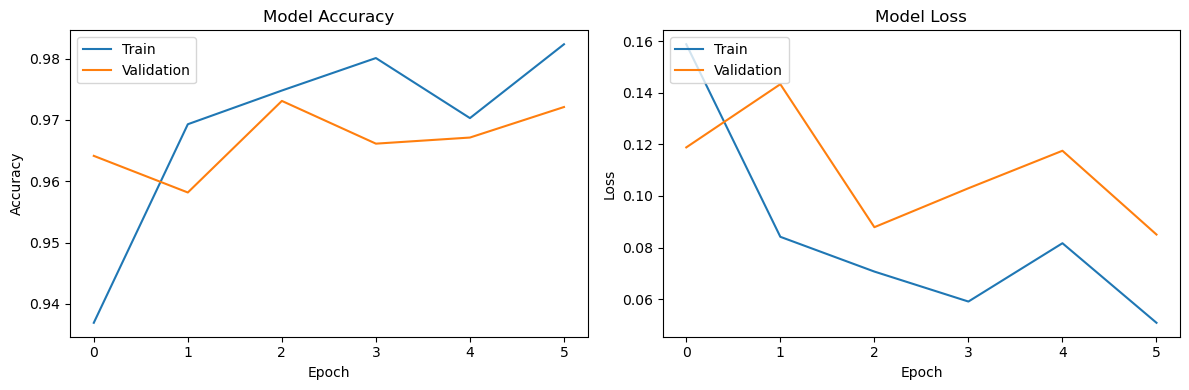

In [9]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## ResNet18 modified

In [71]:
from tensorflow.keras import layers, models

def resnet_block(x, filters, kernel_size=3, stride=1, conv_shortcut=False, name=None):
    shortcut = x

    if conv_shortcut:
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=stride, use_bias=False, name=f'{name}.shortcut')(shortcut)
        shortcut = layers.BatchNormalization(name=f'{name}.shortcut_bn')(shortcut)

    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same', use_bias=False, name=f'{name}.conv1')(x)
    x = layers.BatchNormalization(name=f'{name}.bn1')(x)
    x = layers.ReLU(name=f'{name}.relu1')(x)

    x = layers.Conv2D(filters, kernel_size, padding='same', use_bias=False, name=f'{name}.conv2')(x)
    x = layers.BatchNormalization(name=f'{name}.bn2')(x)

    x = layers.Add(name=f'{name}.add')([shortcut, x])
    x = layers.ReLU(name=f'{name}.relu2')(x)

    return x

def custom_resnet(input_shape=(96, 96, 3), num_classes=1):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, 7, strides=2, padding='same', use_bias=False, name='conv1')(inputs)
    x = layers.BatchNormalization(name='bn1')(x)
    x = layers.ReLU(name='relu1')(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same', name='maxpool')(x)

    x = resnet_block(x, 64, name='res2.0')
    x = resnet_block(x, 64, name='res2.1')

    x = layers.GlobalAveragePooling2D(name='avgpool')(x)
    x = layers.Dense(num_classes, activation='sigmoid', name='fc')(x)

    model = models.Model(inputs, x, name='custom_resnet')
    return model

In [73]:
# Summary of the model
model1 = custom_resnet()

model1.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "custom_resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 conv1 (Conv2D)              (None, 48, 48, 64)           9408      ['input_3[0][0]']             
                                                                                                  
 bn1 (BatchNormalization)    (None, 48, 48, 64)           256       ['conv1[0][0]']               
                                                                                                  
 relu1 (ReLU)                (None, 48, 48, 64)           0         ['bn1[0][0]']                 
                                                                                      

In [12]:
model1 = custom_resnet()

# Compile the model
model1.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks 
early_stopping1 = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Fit the model
history1 = model1.fit(train_dataset, epochs=20, validation_data=test_dataset, callbacks=[early_stopping1])

Epoch 1/20
626/626 [==============================] - 84s 132ms/step - loss: 0.4779 - accuracy: 0.7662 - val_loss: 0.9591 - val_accuracy: 0.5518
Epoch 2/20
626/626 [==============================] - 84s 133ms/step - loss: 0.2385 - accuracy: 0.9047 - val_loss: 1.1464 - val_accuracy: 0.6026
Epoch 3/20
626/626 [==============================] - 78s 124ms/step - loss: 0.1603 - accuracy: 0.9396 - val_loss: 0.3981 - val_accuracy: 0.8108
Epoch 4/20
626/626 [==============================] - 81s 128ms/step - loss: 0.1281 - accuracy: 0.9519 - val_loss: 0.2008 - val_accuracy: 0.9283
Epoch 5/20
626/626 [==============================] - 85s 135ms/step - loss: 0.1067 - accuracy: 0.9618 - val_loss: 3.0904 - val_accuracy: 0.5339
Epoch 6/20
626/626 [==============================] - 85s 135ms/step - loss: 0.0975 - accuracy: 0.9657 - val_loss: 0.8573 - val_accuracy: 0.5618
Epoch 7/20
626/626 [==============================] - 88s 139ms/step - loss: 0.0861 - accuracy: 0.9695 - val_loss: 0.2027 - val_ac

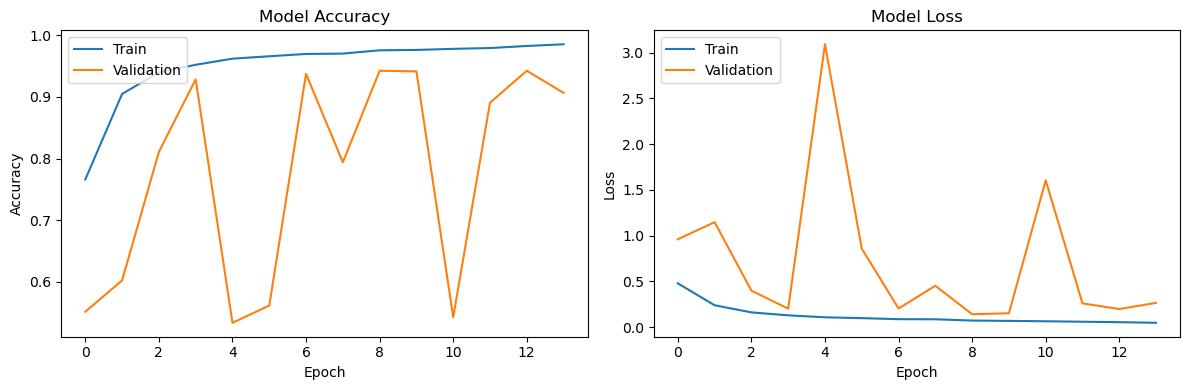

In [13]:
import matplotlib.pyplot as plt

# Plot accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot loss values
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Task 1.2

In [57]:
baseline_b = tf.zeros(shape=(96,96,3))
baseline_w = tf.ones(shape=(96,96,3))

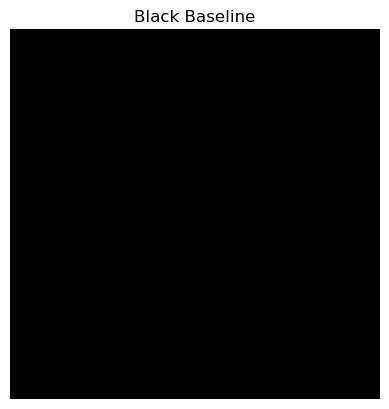

In [59]:
plt.imshow(baseline_b)
plt.title("Black Baseline")
plt.axis('off')

plt.show()

In [77]:
def integral_approximation(gradients):
    
    grads = (gradients[:-1] + gradients[1:]) / 2.0
    integrated_gradients = tf.reduce_mean(grads, axis=0)
    return integrated_gradients


In [78]:
def integrated_gradients(baseline, image, target_class_idx, model, m_steps=50, batch_size=32):
    #if baseline is None:
       # baseline = np.zeros_like(image)

    # Generate alphas.
    alphas = tf.linspace(start=0.0, stop=1.0, num=m_steps+1)

    # Collect gradients.
    gradient_batches = []

    for alpha in tf.range(0, len(alphas), batch_size):
        from_ = alpha
        to = tf.minimum(from_ + batch_size, len(alphas))
        alpha_batch = alphas[from_:to]

        gradient_batch = one_batch(baseline, image, alpha_batch, target_class_idx, model)
        gradient_batches.append(gradient_batch)

    # Concatenate
    total_gradients = tf.concat(gradient_batches, axis=0)

    # Integral approximation through averaging gradients.
    avg_gradients = integral_approximation(gradients=total_gradients)

    # Scale integrated gradients with respect to input.
    integrated_gradients = (image - baseline) * avg_gradients

    return integrated_gradients

In [79]:
def interpolate_images(baseline, image, alphas):
    alphas_x = alphas[:, tf.newaxis, tf.newaxis, tf.newaxis]
    baseline_x = tf.expand_dims(baseline, axis=0)
    input_x = tf.expand_dims(image, axis=0)
    delta = input_x - baseline_x
    images = baseline_x + alphas_x * delta
    return images

In [80]:
@tf.function
def compute_gradients(images, target_class_idx, model):
    with tf.GradientTape() as tape:
        tape.watch(images)
        predictions = model(images)
        target_class_prob = predictions[:, 0]  

    gradients = tape.gradient(target_class_prob, images)
    return gradients


In [81]:
@tf.function
def one_batch(baseline, image, alpha_batch, target_class_idx, model):
    interpolated_path_input_batch = interpolate_images(baseline=baseline,
                                                       image=image,
                                                       alphas=alpha_batch)
    
    gradient_batch = compute_gradients(images=interpolated_path_input_batch,
                                       target_class_idx=target_class_idx,
                                       model=model)
    return gradient_batch


In [82]:
def plot_img_attributions(model, baseline, image, target_class_idx, m_steps=50, cmap=None, overlay_alpha=0.4):
    attributions = integrated_gradients(baseline=baseline,
                                        image=image,
                                        target_class_idx=target_class_idx,
                                        model=model,  
                                        m_steps=m_steps)


    attribution_mask = tf.reduce_sum(tf.math.abs(attributions), axis=-1)

    fig, axs = plt.subplots(nrows=2, ncols=2, squeeze=False, figsize=(8, 8))

    axs[0, 0].set_title('Baseline image')
    axs[0, 0].imshow(baseline)
    axs[0, 0].axis('off')

    axs[0, 1].set_title('Original image')
    axs[0, 1].imshow(image.numpy().astype("uint8"))
    axs[0, 1].axis('off')

    axs[1, 0].set_title('Attribution mask')
    axs[1, 0].imshow(attribution_mask, cmap=cmap)
    axs[1, 0].axis('off')

    axs[1, 1].set_title('Overlay')
    axs[1, 1].imshow(attribution_mask, cmap=cmap)
    axs[1, 1].imshow(image.numpy().astype("uint8"), alpha=overlay_alpha)
    axs[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

### CNN model - black baseline

In [45]:
model = build_model_CNN(input_shape=(96, 96, 3))
model = model_CNN

# Input data
selected_example = test_dataset.take(1)  

for img, label in selected_example:
    input_example = img[0]  
baseline = tf.zeros(shape=(96,96,3))

# Calculate Integrated Gradients
target_class_idx = 1  
ig_attributions = integrated_gradients(baseline=baseline,
                                       image=input_example,
                                       target_class_idx=target_class_idx,
                                       model=model,
                                       m_steps=50)

print(ig_attributions.shape)

(96, 96, 3)


Baseline shape: (96, 96, 3) Baseline type: <class 'tensorflow.python.framework.ops.EagerTensor'>


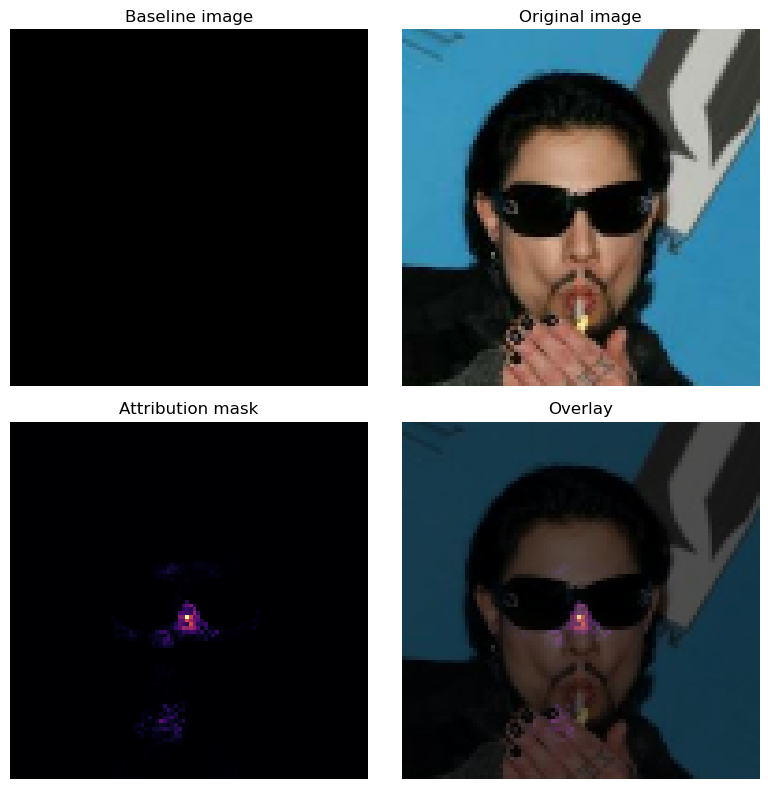

In [62]:
class_index = 0  #  0 'with_glasses' class

# Select an image from the specified class
for images, labels in test_dataset.take(1):
    labels = tf.squeeze(labels, axis=1)
    selected_images = images[labels == class_index]

if len(selected_images) > 0:
    input_example = selected_images[0] 
    plot_img_attributions(model, baseline, input_example, target_class_idx=class_index, m_steps=50, cmap=plt.cm.inferno, overlay_alpha=0.4)
else:
    print(f"No images found for class {class_index}")



Baseline shape: (96, 96, 3) Baseline type: <class 'tensorflow.python.framework.ops.EagerTensor'>


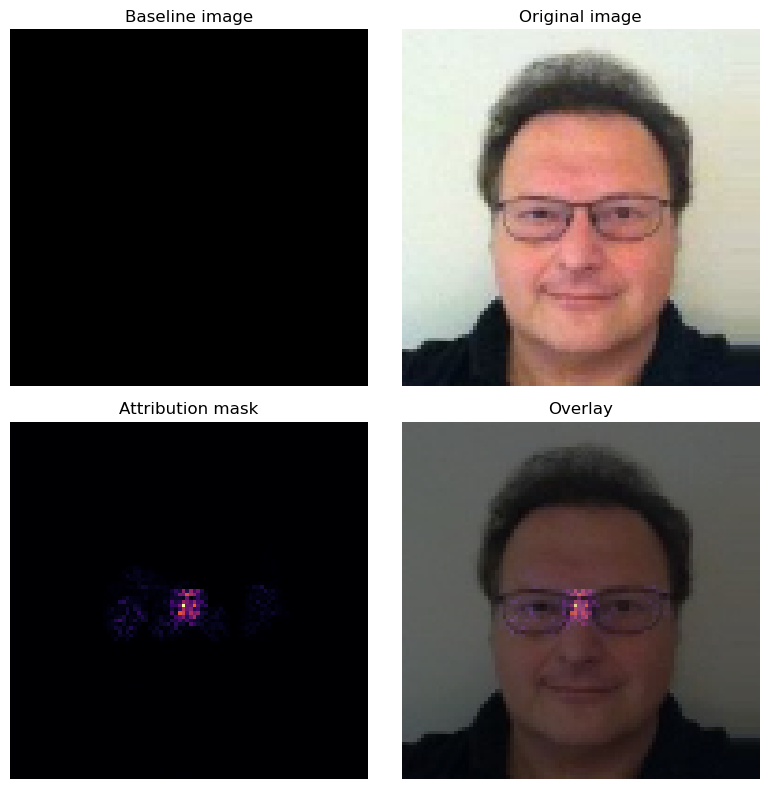

In [56]:
class_index = 0  #  0 'with_glasses' class

# Select an image from the specified class
for images, labels in test_dataset.take(1):
    labels = tf.squeeze(labels, axis=1)
    selected_images = images[labels == class_index]

if len(selected_images) > 0:
    input_example = selected_images[0]  
    plot_img_attributions(model, baseline, input_example, target_class_idx=class_index, m_steps=50, cmap=plt.cm.inferno, overlay_alpha=0.4)
else:
    print(f"No images found for class {class_index}")


Baseline shape: (96, 96, 3) Baseline type: <class 'tensorflow.python.framework.ops.EagerTensor'>


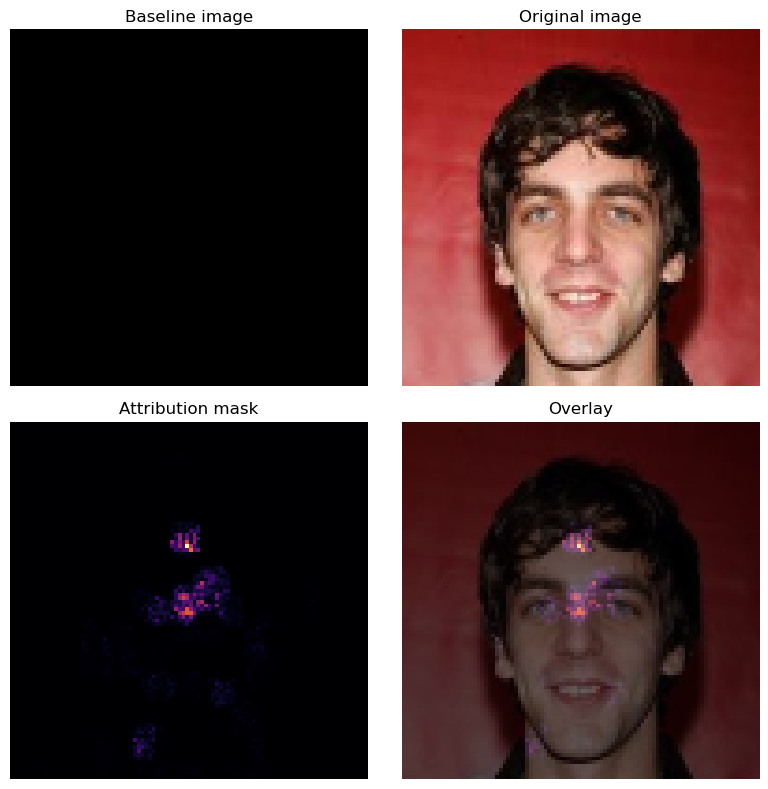

In [58]:
class_index = 1  #  1 'without_glasses' class

# Select an image from the specified class
for images, labels in test_dataset.take(1):
    labels = tf.squeeze(labels, axis=1)
    selected_images = images[labels == class_index]

if len(selected_images) > 0:
    input_example = selected_images[0]  
    plot_img_attributions(model, baseline, input_example, target_class_idx=class_index, m_steps=50, cmap=plt.cm.inferno, overlay_alpha=0.4)
else:
    print(f"No images found for class {class_index}")


Baseline shape: (96, 96, 3) Baseline type: <class 'tensorflow.python.framework.ops.EagerTensor'>


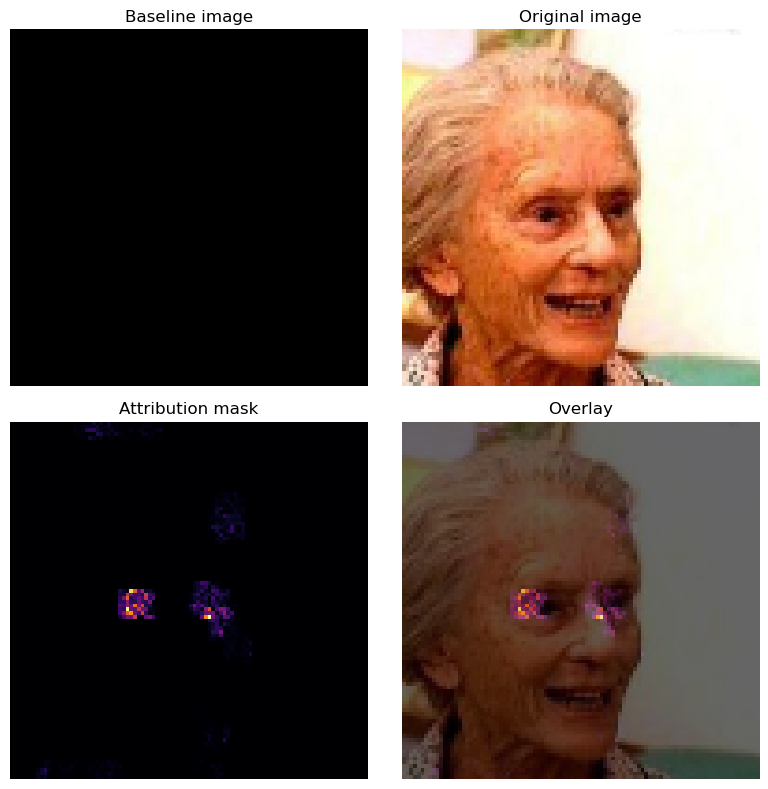

In [77]:
class_index = 1  #  1 'without_glasses' class

# Select an image from the specified class
for images, labels in test_dataset.take(1):
    labels = tf.squeeze(labels, axis=1)
    selected_images = images[labels == class_index]

if len(selected_images) > 0:
    input_example = selected_images[0]  
    plot_img_attributions(model, baseline, input_example, target_class_idx=class_index, m_steps=50, cmap=plt.cm.inferno, overlay_alpha=0.4)
else:
    print(f"No images found for class {class_index}")


### CNN model - withe baseline

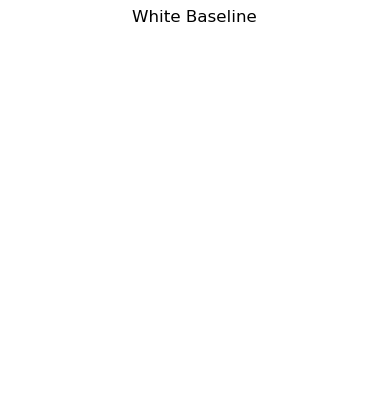

In [97]:
baseline_w = tf.ones(shape=(96,96,3))
plt.imshow(baseline_w)
plt.title("White Baseline")
plt.axis('off')
plt.show()

In [75]:
model = build_model_CNN(input_shape=(96, 96, 3))
model = model_CNN

# Input data
selected_example = test_dataset.take(1)  

for img, label in selected_example:
    input_example = img[0]  
    
baseline_w = tf.ones(shape=(96,96,3))

# Calculate Integrated Gradients
target_class_idx = 1  
ig_attributions = integrated_gradients(baseline=baseline_w,
                                       image=input_example,
                                       target_class_idx=target_class_idx,
                                       model=model,
                                       m_steps=50)


print(ig_attributions.shape)

(96, 96, 3)


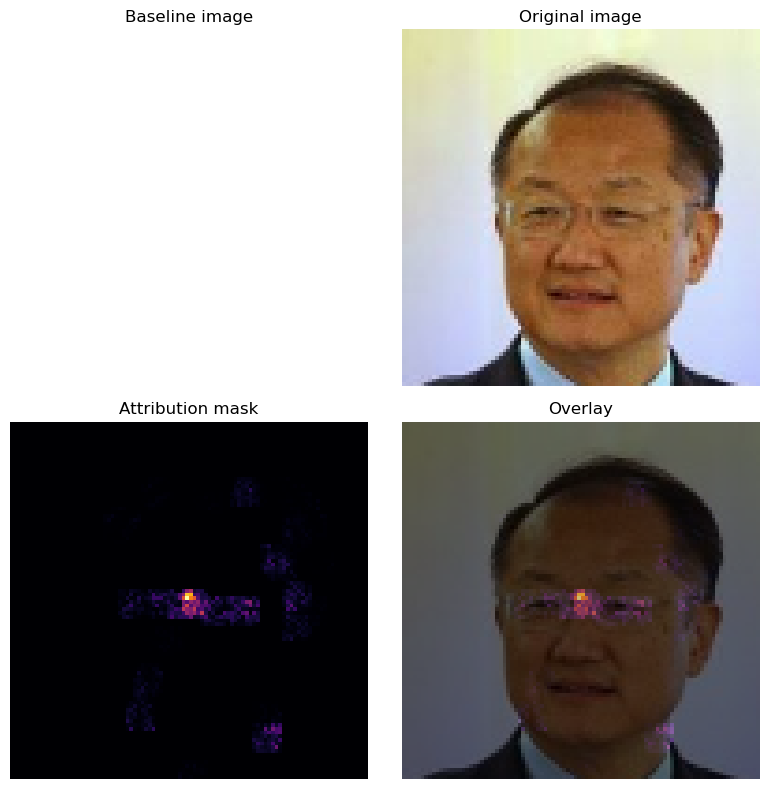

In [87]:
class_index = 0  #  0 'with_glasses' class
baseline_w = tf.ones(shape=(96,96,3))

# Select an image from the specified class
for images, labels in test_dataset.take(1):
    labels = tf.squeeze(labels, axis=1)
    selected_images = images[labels == class_index]

if len(selected_images) > 0:
    input_example = selected_images[0] 
    plot_img_attributions(model, baseline_w, input_example, target_class_idx=class_index, m_steps=50, cmap=plt.cm.inferno, overlay_alpha=0.4)
else:
    print(f"No images found for class {class_index}")


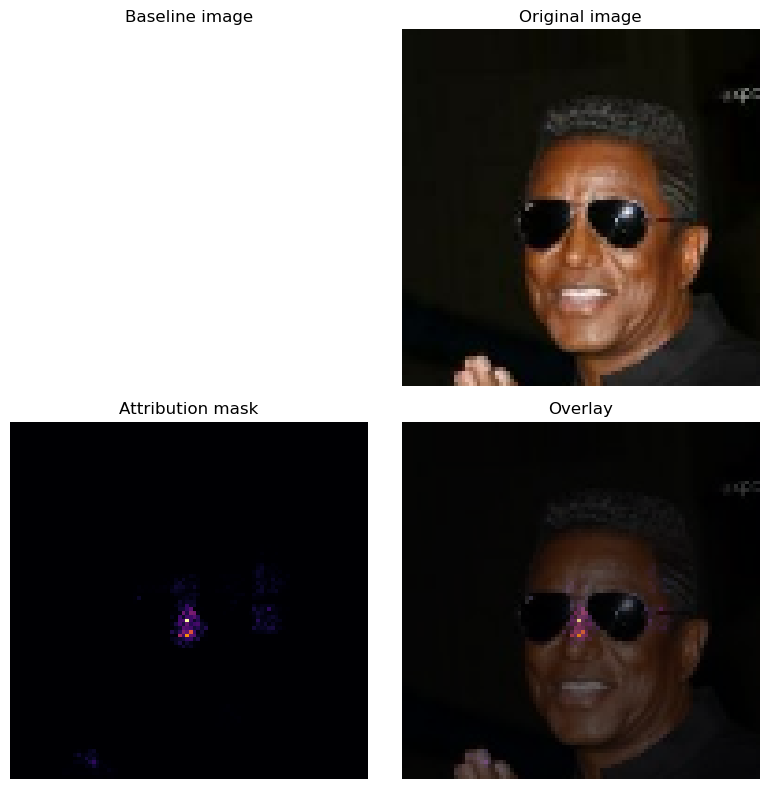

In [96]:
class_index = 0  #  0 'with_glasses' class

# Select an image from the specified class
for images, labels in test_dataset.take(1):
    labels = tf.squeeze(labels, axis=1)
    selected_images = images[labels == class_index]

if len(selected_images) > 0:
    input_example = selected_images[0] 
    plot_img_attributions(model, baseline_w, input_example, target_class_idx=class_index, m_steps=50, cmap=plt.cm.inferno, overlay_alpha=0.4)
else:
    print(f"No images found for class {class_index}")


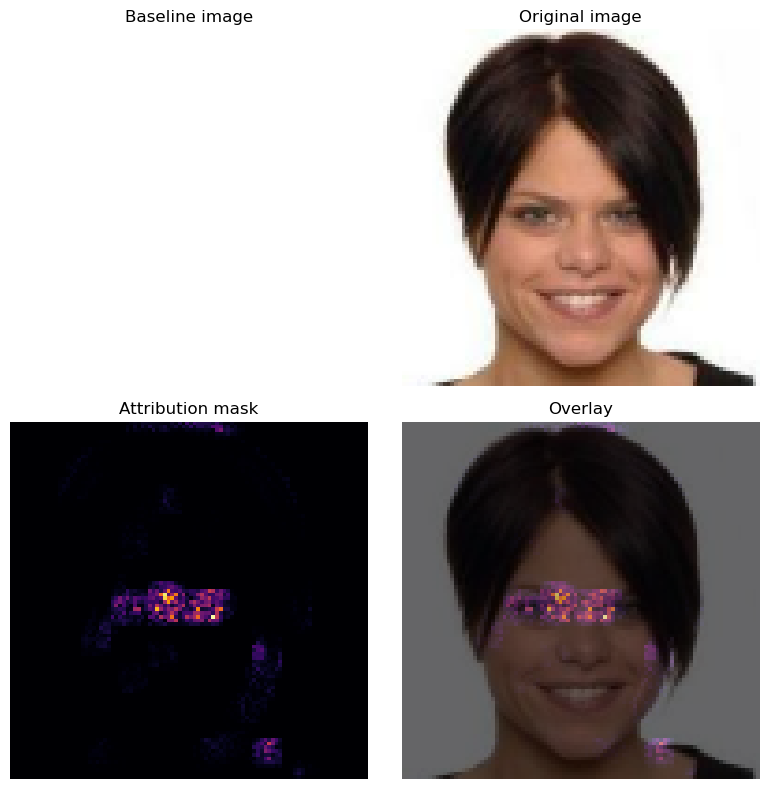

In [72]:
class_index = 1  #  1 'without_glasses' class

# Select an image from the specified class
for images, labels in test_dataset.take(1):
    labels = tf.squeeze(labels, axis=1)
    selected_images = images[labels == class_index]

if len(selected_images) > 0:
    input_example = selected_images[0] 
    plot_img_attributions(model, baseline_w, input_example, target_class_idx=class_index, m_steps=50, cmap=plt.cm.inferno, overlay_alpha=0.4)
else:
    print(f"No images found for class {class_index}")


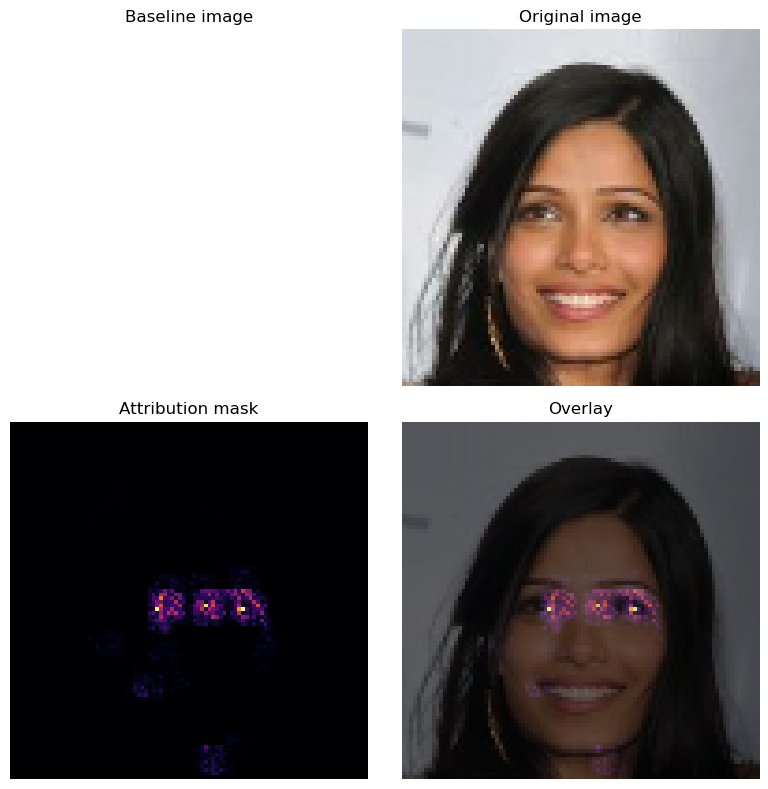

In [73]:
class_index = 1  #  1 'without_glasses' class

# Select an image from the specified class
for images, labels in test_dataset.take(1):
    labels = tf.squeeze(labels, axis=1)
    selected_images = images[labels == class_index]

if len(selected_images) > 0:
    input_example = selected_images[0] 
    plot_img_attributions(model, baseline_w, input_example, target_class_idx=class_index, m_steps=50, cmap=plt.cm.inferno, overlay_alpha=0.4)
else:
    print(f"No images found for class {class_index}")


# Face-Recognition with Contrastive Loss Function

# Load the data

In [2]:
train_path = 'shared/389.204-2023W/celebA/contrastive_learning/train'
test_path = 'shared/389.204-2023W/celebA/contrastive_learning/test'
image_size = (96, 96)
batch_size = 32

train_dataset = image_dataset_from_directory(
    directory = train_path,
    labels='inferred',
    image_size=image_size,
    color_mode='rgb',
    batch_size=32,
    crop_to_aspect_ratio=True,
    shuffle=True,
    seed=42,
    validation_split=None)

test_dataset = image_dataset_from_directory(
    directory = test_path,
    labels='inferred',
    image_size=image_size,
    color_mode='rgb',
    batch_size=32,
    crop_to_aspect_ratio=True,
    shuffle=True,
    seed=42,
    validation_split=None)


train_dataset = train_dataset.map(lambda x, y: (tf.image.resize(x, (96, 96)), y))
test_dataset = test_dataset.map(lambda x, y: (tf.image.resize(x, (96, 96)), y))


Found 15005 files belonging to 500 classes.
Found 150 files belonging to 5 classes.


Train Set:


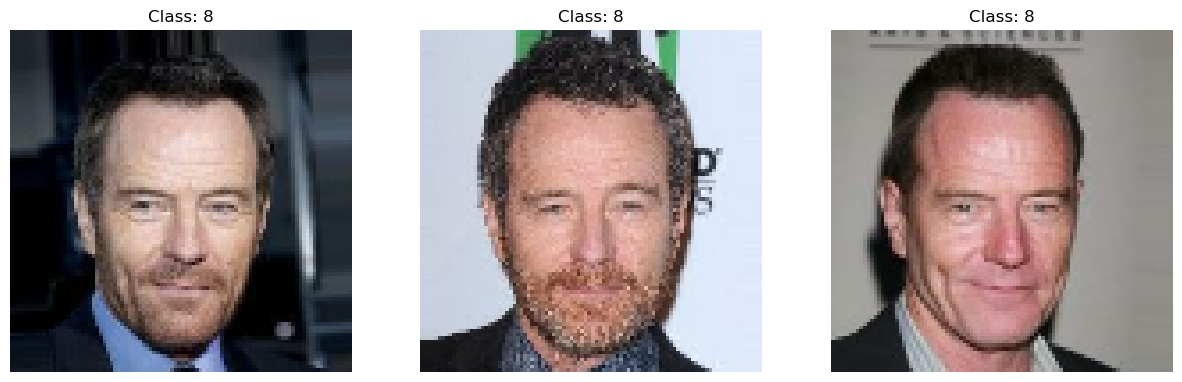

Test set:


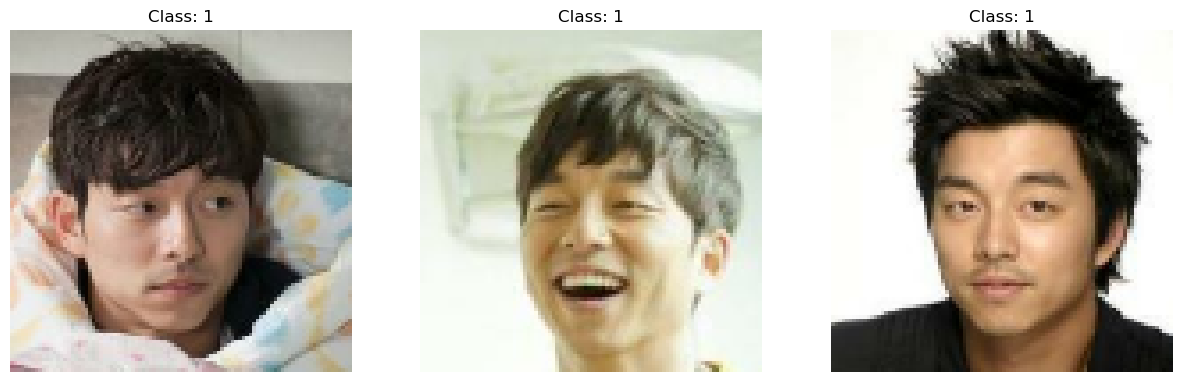

In [5]:
# Visualize images 
def visualize_images_for_class(dataset, target_class, num_samples=3):
    plt.figure(figsize=(15, 6))
    
    images_count = 0
    for images, labels in dataset:
        for i in range(len(images)):
            if labels[i].numpy() == target_class:
                images_count += 1
                plt.subplot(1, num_samples, images_count)
                plt.imshow(images[i].numpy().astype("uint8"))
                plt.title(f"Class: {labels[i].numpy()}")
                plt.axis("off")

                if images_count == num_samples:
                    break
        
        if images_count == num_samples:
            break  

    plt.show()



# Visualize 3 images in the training set
print('Train Set:')
visualize_images_for_class(train_dataset, 8)

print('Test set:')
visualize_images_for_class(test_dataset, 1)


In [3]:
def extract_data_labels(dataset):
    data = []
    labels = []

    for images, labels_batch in dataset:
        data.extend(images.numpy())  
        labels.extend(labels_batch.numpy())

    return np.array(data), np.array(labels)

# Extract and divide data and labels for the training set
X_train, y_train = extract_data_labels(train_dataset)

# Extract and divide data and labels for the testing set
X_test, y_test = extract_data_labels(test_dataset)


# Task 2.1

## Generate triplets

In [4]:
import numpy as np
import random

def generate_triplets(X, y, num_triplets=1000):
    '''
    Function that generates triplets of the samples in X with y representing the respective classes
    '''
    collection_X_anchor = []
    collection_X_positive = []
    collection_X_negative = []

    for _ in range(num_triplets):
        i = random.choice(list(set(y)))

        #Randomlly selects an anchor sample
        indices = np.where(y == i)[0]
        anchor = X[np.random.choice(indices)]

        #Randomlly selects a positive sample from the same class as the anchor
        indices = np.where(y == i)[0]
        positive = X[np.random.choice(indices)]

        #Randomlly selects a negative sample from a different class as the anchor
        indices = np.where(y != i)[0]
        negative = X[np.random.choice(indices)]

        collection_X_anchor.append(anchor)
        collection_X_positive.append(positive)
        collection_X_negative.append(negative)

    '''
    Returns a collection of triplets as a dictionary.
    Can directly be passed to model.fit()
    if the inputs are names accordingly in
    tf.keras.models.Model({}, )
    '''

    return {'anchor': np.array(collection_X_anchor), 'positive': np.array(collection_X_positive), 'negative': np.array(collection_X_negative)}

if __name__ == '__main__':
    '''
    Generates a given number of triplets from the train and test dataset
    '''

    X_triplet_train = generate_triplets(
        X_train, y_train, 10000
    )

    X_triplet_test = generate_triplets(
        X_test, y_test, 500
    )


In [6]:
print("Shape of X_triplet_train['anchor']: ", X_triplet_train['anchor'].shape)
print("Shape of X_triplet_train['positive']: ", X_triplet_train['positive'].shape)
print("Shape of X_triplet_train['negative']: ", X_triplet_train['negative'].shape)

print("Shape of X_triplet_test['anchor']: ", X_triplet_test['anchor'].shape)
print("Shape of X_triplet_test['positive']: ", X_triplet_test['positive'].shape)
print("Shape of X_triplet_test['negative']: ", X_triplet_test['negative'].shape)


Shape of X_triplet_train['anchor']:  (10000, 96, 96, 3)
Shape of X_triplet_train['positive']:  (10000, 96, 96, 3)
Shape of X_triplet_train['negative']:  (10000, 96, 96, 3)
Shape of X_triplet_test['anchor']:  (500, 96, 96, 3)
Shape of X_triplet_test['positive']:  (500, 96, 96, 3)
Shape of X_triplet_test['negative']:  (500, 96, 96, 3)


Train:


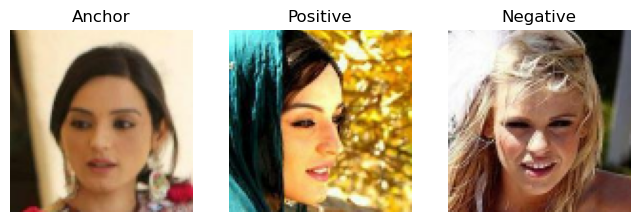

Test:


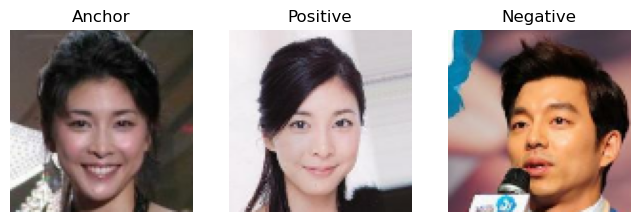

In [9]:
def plot_triplet(anchor, positive, negative):
    plt.figure(figsize=(8, 4))

    # Plot Anchor
    plt.subplot(1, 3, 1)
    plt.imshow(anchor.astype("uint8"))
    plt.title('Anchor')
    plt.axis('off')

    # Plot Positive
    plt.subplot(1, 3, 2)
    plt.imshow(positive.astype("uint8"))
    plt.title('Positive')
    plt.axis('off')

    # Plot Negative
    plt.subplot(1, 3, 3)
    plt.imshow(negative.astype("uint8"))
    plt.title('Negative')
    plt.axis('off')

    plt.show()


triplet_index = 30

print('Train:')
# Plot the triplet
plot_triplet(
    X_triplet_train['anchor'][triplet_index],
    X_triplet_train['positive'][triplet_index],
    X_triplet_train['negative'][triplet_index]
)

print('Test:')
plot_triplet(
    X_triplet_test['anchor'][triplet_index],
    X_triplet_test['positive'][triplet_index],
    X_triplet_test['negative'][triplet_index]
)


## Triplet Network

In [5]:
import tensorflow.keras.layers as tfl

def custom_accuracy(_, predicted_distance):
    positive_distance, negative_distance = predicted_distance[:, 0], predicted_distance[:, 1]
    return tf.reduce_mean(tf.cast(positive_distance < negative_distance, tf.float32))

def triplet_loss(_, predicted_distance, alpha=0.5):
    positive_distance, negative_distance = predicted_distance[:, 0], predicted_distance[:, 1]
    loss = tf.maximum(positive_distance - negative_distance + alpha, 0.0)
    return loss

if __name__ == '__main__':
    '''
    Template code for implementing a Triplet network in tensorflow
    '''

    # Set the param
    input_shape = (96, 96, 3)

    # Generate three inputs for the anchor, the positive, and the negative sample
    anchor_input = tfl.Input(shape=input_shape, name="anchor")
    positive_input = tfl.Input(shape=input_shape, name="positive")
    negative_input = tfl.Input(shape=input_shape, name="negative")

    # Define the embedding network
    embedding_network = tf.keras.Sequential([ 
        tfl.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[96, 96, 3]),
        tfl.Flatten(),
        tfl.Dense(128),
        tfl.Dense(20, activation="linear")
    ])

    # Compute the embeddings using the same network for all three inputs
    anchor_embedding = embedding_network(anchor_input)
    positive_embedding = embedding_network(positive_input)
    negative_embedding = embedding_network(negative_input)

    # Compute the Euclidean distance of the anchor embedding to the positive and negative sample
    distance_positive = tf.norm(anchor_embedding - positive_embedding, ord='euclidean', axis=-1)
    distance_negative = tf.norm(anchor_embedding - negative_embedding, ord='euclidean', axis=-1)

    # Concatenate the outputs such that they can be accessed in the triplet loss formulation
    distances = tf.stack([distance_positive, distance_negative], -1)

    # Define the triplet network model
    triplet_network = tf.keras.models.Model(
        {'anchor': anchor_input, 'positive': positive_input, 'negative': negative_input}, distances
    )

    # Compile the model with the triplet loss and custom accuracy
    triplet_network.compile(optimizer='adam', loss=triplet_loss, metrics=[custom_accuracy])


In [6]:
dummy_target_val = np.zeros((X_triplet_test['anchor'].shape[0], 1))
dummy_target = np.zeros((X_triplet_train['anchor'].shape[0], 1))

# Train the triplet network
history = triplet_network.fit(
    X_triplet_train,
    dummy_target,  
    epochs=10,
    validation_data=(X_triplet_test, dummy_target_val)  
)


Epoch 1/10
313/313 [==============================] - 58s 183ms/step - loss: 328.6148 - custom_accuracy: 0.6777 - val_loss: 176.2165 - val_custom_accuracy: 0.7320
Epoch 2/10
313/313 [==============================] - 58s 184ms/step - loss: 103.3728 - custom_accuracy: 0.8033 - val_loss: 158.8300 - val_custom_accuracy: 0.7598
Epoch 3/10
313/313 [==============================] - 58s 184ms/step - loss: 49.9731 - custom_accuracy: 0.8695 - val_loss: 147.3370 - val_custom_accuracy: 0.7637
Epoch 4/10
313/313 [==============================] - 57s 183ms/step - loss: 35.4570 - custom_accuracy: 0.9014 - val_loss: 140.3378 - val_custom_accuracy: 0.7586
Epoch 5/10
313/313 [==============================] - 55s 176ms/step - loss: 30.1422 - custom_accuracy: 0.9165 - val_loss: 162.9922 - val_custom_accuracy: 0.7855
Epoch 6/10
313/313 [==============================] - 58s 186ms/step - loss: 30.7657 - custom_accuracy: 0.9177 - val_loss: 130.7804 - val_custom_accuracy: 0.7836
Epoch 7/10
313/313 [======

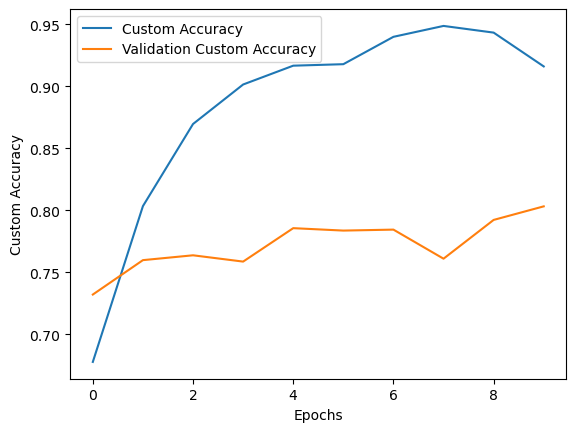

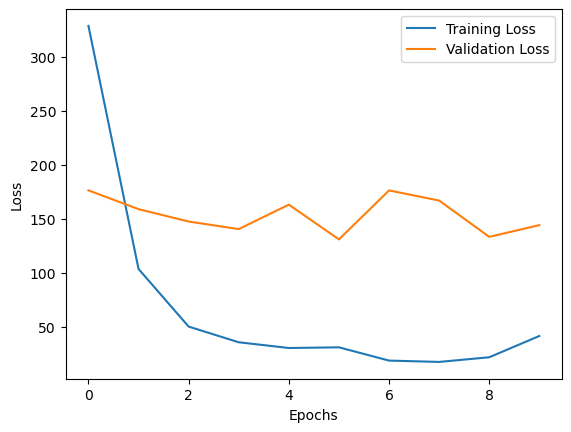

In [7]:
# Plot the custom accuracy
plt.plot(history.history['custom_accuracy'], label='Custom Accuracy')
plt.plot(history.history['val_custom_accuracy'], label='Validation Custom Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Custom Accuracy')
plt.legend()
plt.show()

# Plot the custom loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [35]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

# Define the embedding network
def embedding_network(input):
    input_layer = input
    conv1 = tfl.Conv2D(32, (2, 2), activation='relu' )(input_layer)
    maxpool1 = tfl.MaxPooling2D((2, 2))(conv1)
    conv2 = tfl.Conv2D(64, (2, 2), activation='relu' )(maxpool1)
    maxpool2 = tfl.MaxPooling2D((2, 2))(conv2)

    flatten = tfl.Flatten()(maxpool2)

    Embedd = tfl.Dense(128, activation='relu' )(flatten)
    
    model = tf.keras.models.Model(inputs=input_layer, outputs=Embedd)

    return model


def custom_accuracy(_, predicted_distance):
    positive_distance, negative_distance = predicted_distance[:, 0], predicted_distance[:, 1]
    return tf.reduce_mean(tf.cast(positive_distance < negative_distance, tf.float32))

def triplet_loss(_, predicted_distance, alpha=0.2):
    positive_distance, negative_distance = predicted_distance[:, 0], predicted_distance[:, 1]
    return tf.maximum(positive_distance - negative_distance + alpha, 0.0)


if __name__ == '__main__':
    # Define parameters
    input_shape = (96, 96, 3)  # Modify based on your actual input shape
    alpha = 0.2  # Margin term


    # Generate three inputs for the anchor, the positive, and the negative sample
    anchor_input = tfl.Input(shape=input_shape, name="anchor")
    positive_input = tfl.Input(shape=input_shape, name="positive")
    negative_input = tfl.Input(shape=input_shape, name="negative")

# Compute the embeddings using the same network for all three inputs
    anchor_embedding = embedding_network(anchor_input).output
    positive_embedding = embedding_network(positive_input).output
    negative_embedding = embedding_network(negative_input).output


    # Compute the Euclidean distance of the anchor embedding to the positive and negative sample
    distance_positive = tf.norm(anchor_embedding - positive_embedding, ord="euclidean", axis=-1)
    distance_negative = tf.norm(anchor_embedding - negative_embedding, ord="euclidean", axis=-1)

    # Concatenate the outputs for the triplet loss formulation
    distances = tf.stack([distance_positive, distance_negative], -1)

    triplet_network = tf.keras.models.Model(
        {'anchor': anchor_input, 'positive': positive_input, 'negative': negative_input}, distances
    )


In [22]:
anchor_input.shape

TensorShape([None, 96, 96, 3])

In [37]:
 anchor_embedding.shape

TensorShape([None, 128])

In [ ]:

# Compile the model
triplet_network.compile(optimizer='adam', loss=triplet_loss, metrics=[custom_accuracy])

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Train the model with early stopping
history = triplet_network.fit(
    X_triplet_train,
    np.zeros(X_triplet_train['anchor'].shape[0]),  # Dummy labels, as the loss function is customized
    epochs=10,  # Choose the number of epochs
    validation_data=(
        X_triplet_test,
        np.zeros(X_triplet_test['anchor'].shape[0])
    ),
    callbacks=[early_stopping],  # Add the early stopping callback
)

In [17]:
triplet_network.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 anchor (InputLayer)         [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 positive (InputLayer)       [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 negative (InputLayer)       [(None, 96, 96, 3)]          0         []                            
                                                                                                  
 sequential (Sequential)     (None, 20)                   1888194   ['anchor[0][0]',              
                                                          0          'positive[0][0]',        

# Task 2.2

In [18]:
for layer in embedding_network.layers:
    print(layer.name)

conv2d
flatten
dense
dense_1


In [8]:
#test embeddings
trained_embedding_network = tf.keras.models.Model(inputs=embedding_network.layers[0].input, 
                                                 outputs=embedding_network.layers[3].output)


test_embeddings = trained_embedding_network.predict(X_test)

5/5 [==============================] - 0s 13ms/step


Smallest Eucledian distance:

In [24]:
from sklearn.metrics.pairwise import euclidean_distances
# Euclidean distances 
distances_matrix = euclidean_distances(test_embeddings, test_embeddings)

# Set diagonal elements (distances to self) to a large value to exclude them from consideration
np.fill_diagonal(distances_matrix, np.inf)

# Find indices of the pair with the smallest Euclidean distance 
min_distance_indices = np.unravel_index(np.argmin(distances_matrix), distances_matrix.shape)
image1_label = y_test[min_distance_indices[0]]
image2_label = y_test[min_distance_indices[1]]

# Result
print(f"Indices of images with smallest Euclidean distance: {min_distance_indices}")
print(f"Labels of the corresponding images: {image1_label} and {image2_label}")

min_distance = distances_matrix[min_distance_indices]
print(f"Euclidean distance between the images: {min_distance}")


Indices of images with smallest Euclidean distance: (2, 49)
Labels of the corresponding images: 0 and 0
Euclidean distance between the images: 244.97256469726562


 Biggest Euclidean distance:

In [25]:
# Euclidean distances 
distances_matrix = euclidean_distances(test_embeddings, test_embeddings)

# Find indices of the pair with the largest Euclidean distance
max_distance_indices = np.unravel_index(np.argmax(distances_matrix), distances_matrix.shape)
image1_label_max = y_test[max_distance_indices[0]]
image2_label_max = y_test[max_distance_indices[1]]

# Results
print(f"Indices of images with largest Euclidean distance: {max_distance_indices}")
print(f"Labels of the corresponding images: {image1_label_max} and {image2_label_max}")

max_distance = distances_matrix[max_distance_indices]
print(f"Euclidean distance between the images: {max_distance}")


Indices of images with largest Euclidean distance: (63, 141)
Labels of the corresponding images: 2 and 3
Euclidean distance between the images: 7717.89599609375


In [29]:
# distances between images in the same class and different classes
def calculate_distances(embeddings, labels):
    same_class_distances = []
    different_class_distances = []

    for i in range(len(labels)):
        for j in range(i + 1, len(labels)):
            distance = np.linalg.norm(embeddings[i] - embeddings[j])
            if labels[i] == labels[j]:
                same_class_distances.append(distance)
            else:
                different_class_distances.append(distance)

    return same_class_distances, different_class_distances

# Calculate distances
same_class_distances, different_class_distances = calculate_distances(test_embeddings, y_test)

print(f"Distances between images in the same class:")
print(same_class_distances[:5])  
print(f"\nDistances between images of different classes:")
print(different_class_distances[:5])  

# mean and standard deviation
print(f"\nStatistics:")
print(f"Mean distance within the same class: {np.mean(same_class_distances)}")
print(f"Standard deviation of distances within the same class: {np.std(same_class_distances)}")
print(f"Mean distance between different classes: {np.mean(different_class_distances)}")
print(f"Standard deviation of distances between different classes: {np.std(different_class_distances)}")


Distances between images in the same class:
[4076.9458, 2500.1106, 1331.4108, 2345.249, 2819.8037]

Distances between images of different classes:
[4881.654, 3631.2988, 4337.093, 3728.3057, 4393.229]

Statistics:
Mean distance within the same class: 2857.829833984375
Standard deviation of distances within the same class: 715.0342407226562
Mean distance between different classes: 3790.09814453125
Standard deviation of distances between different classes: 960.7953491210938


#### PCA visualization

In [33]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(test_embeddings)

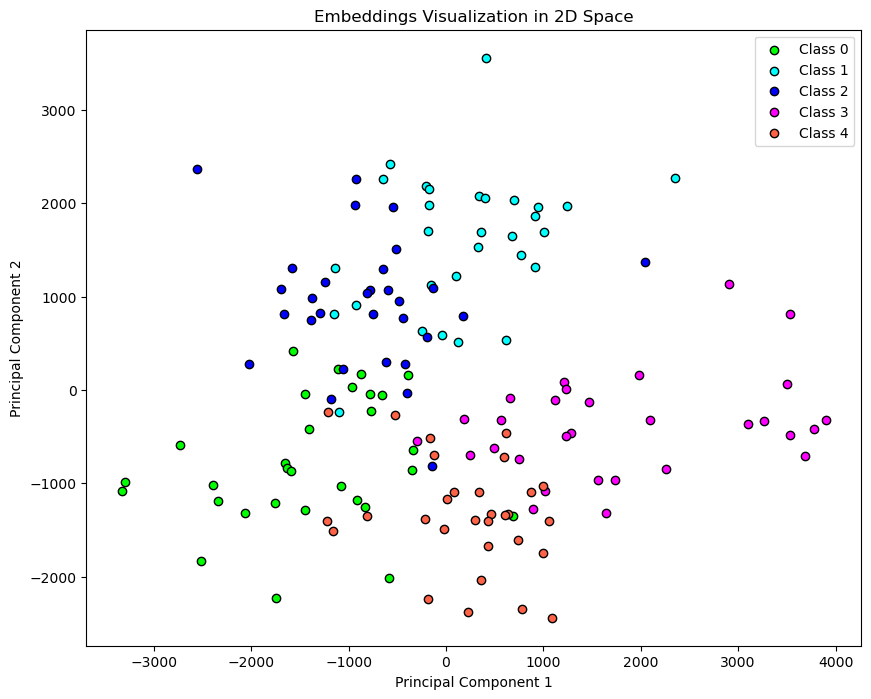

In [16]:
custom_colors = ['lime', 'cyan', 'blue', 'magenta', 'tomato']

unique_labels = list(set(y_test))
legend_dict = {label: color for label, color in zip(unique_labels, custom_colors)}

# Scatterplot 
plt.figure(figsize=(10, 8))
for label in unique_labels:
    indices = (y_test == label)
    plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], c=legend_dict[label], label=f'Class {label}', marker='o', edgecolors='k')

plt.title('Embeddings Visualization in 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.legend()

plt.show()
